In [1]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text, scale_shape_manual
import pandas as pd

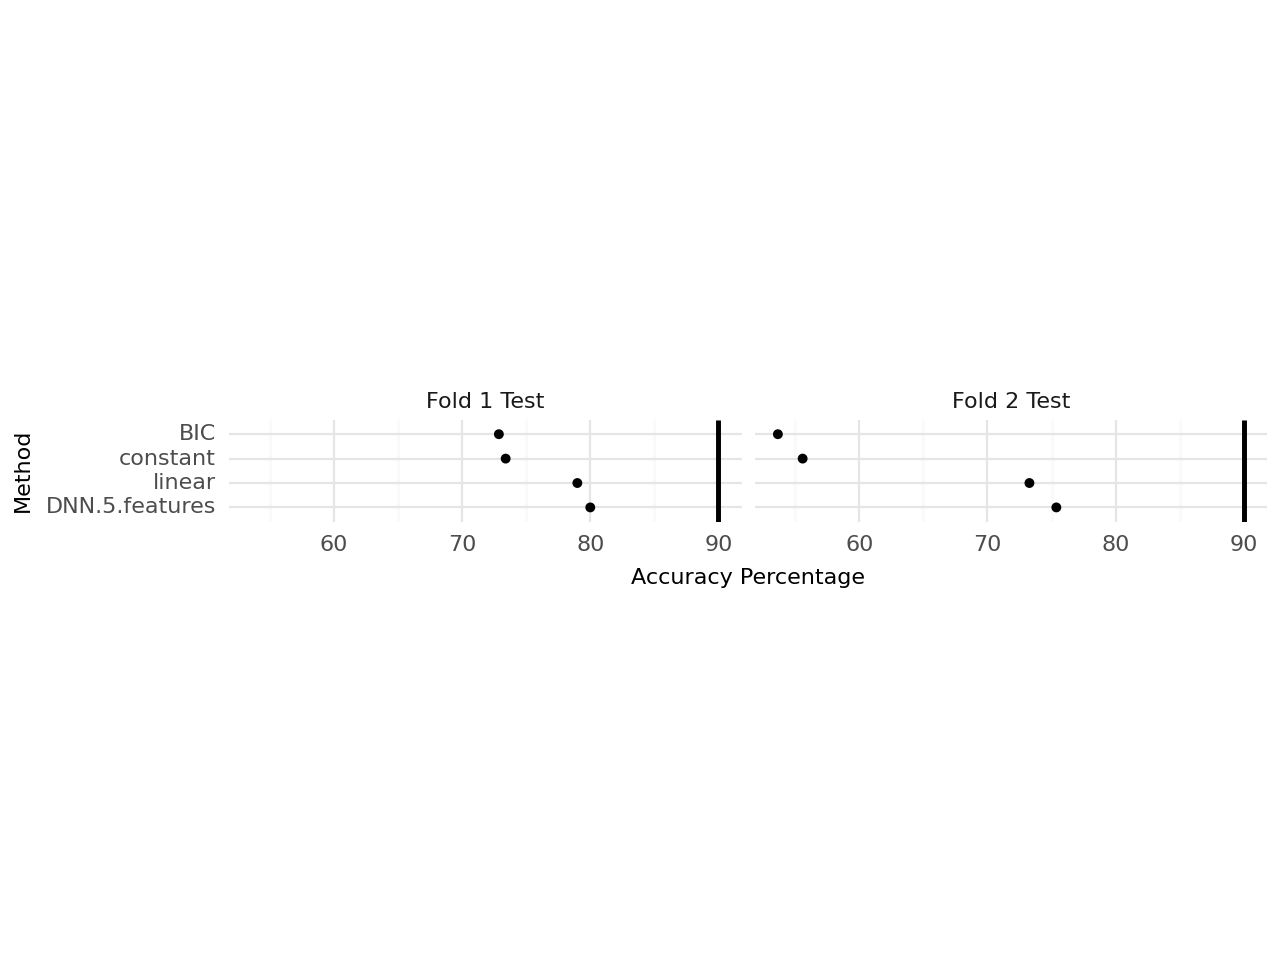

In [15]:
# Data
methods = ['BIC', 'constant', 'linear', 'DNN.5.features']
acc_1   = [72.87,  73.40,      78.99,    80]
acc_2   = [53.65,  55.58,      73.27,    75.37]

# Creating data for fold 1
data_fold1 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_1,
    'Fold': 'Fold 1 Test'
})

# Creating data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_2,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Order methods by accuracy
method_order = data.groupby('Method')['Accuracy'].mean().sort_values(ascending=False).index

# Convert Method column to categorical with the desired order
data['Method'] = pd.Categorical(data['Method'], categories=method_order, ordered=True)

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method')) +
                 geom_point(size=1) +
                 labs(title="",
                      x="Accuracy Percentage",
                      y="Method") +
                 facet_wrap('~Fold', ncol=2) +
                 geom_vline(xintercept=90, color="black", size=1) +
                 theme_minimal() +
                 theme(legend_position='bottom', text=element_text(size=8)) +
                 theme(aspect_ratio=0.2)
                 )  # Adjust aspect ratio to decrease the distance between methods

# Displaying the combined plot
print(plot_combined)